# Predicting heart disease using Machine Learning

This notebook looks into using various Pythong-based ML and DS libraries in an attempt to build a ML model to predict heart disease based on certain medical attributes.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether the patient has heart disease or not?

## 2. Data

The original data came from Cleveland data from UCI ML repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

There is also a version of it available on Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci)

## 3. Evaluation

> If we can reach 95% accuracy during POC, we'll puruse the project

## 4. Features

This is where you will get different information about each of features in your data. You can do this via self-research or by talking to subject matter expert (SME)

**Create a data dictionary**

1. age in years
2. sex (1 = male; 0 = female)
3. cp chest pain type
   - 0:Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic
4. trestbps resting blood pressure (in mm Hg on admission to the hospital). Anything above 130 is cause for concern
5. chol serum cholestoral in mg/dl
    - serum = LDL + HDL + 0.2 * triglycerides
    - above 200 is cause for concern
6. fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach maximum heart rate achieved
9. exang exercise induced angina (1 = yes; 0 = no)
10. oldpeak ST depression induced by exercise relative to rest
11. slope the slope of the peak exercise ST segment
    - 0: Upsloping
    - 1: Flatsloping
    - 2. Downslping
12. ca number of major vessels (0-3) colored by flourosopy
    - colored vessel means doctor can see blood passing through
    - more the blood movement, the better (no clots)
13. thal 3 = normal; 6 = fixed defect; 7 = reversable defect
    - 1,3: normal
    - 6: fixed defect
    - 7: reversable defect
14. target 1 or 0 

## Preparing tools

We are going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [6]:
# Import all tools we need

# Regular Exploratory Data Analysis (EDA) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear inside notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [8]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis -EDA)

The goal is to find more about the data and become and SME :)

1. What question(s) are you trying to solve?
2. What kind of data do you have and how do you treat different types?
3. What is missing from data and how to deal with it?
4. What are outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
# Let's find out how many of each class do we have
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

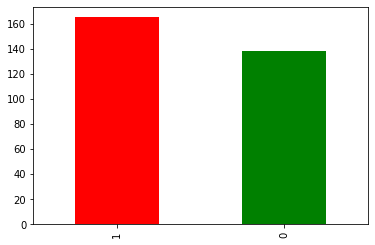

In [11]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"]);

In [13]:
# Deatils about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
# Compare different columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [19]:
# Compare Target with Sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


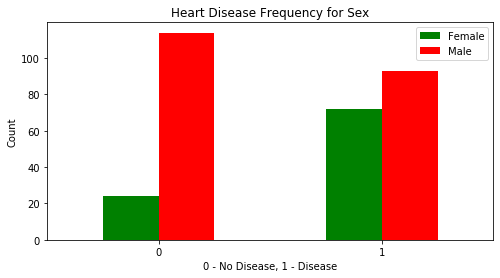

In [45]:
# Plot crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(8,4),
                                   color=["green", "red"]);
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 - No Disease, 1 - Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

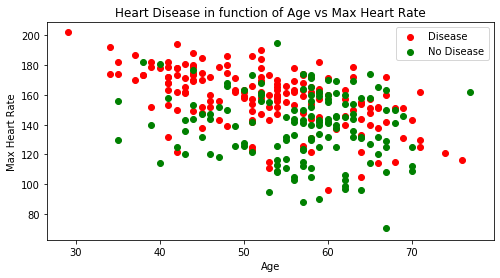

In [44]:
# Create another figure
plt.figure(figsize=(8,4))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green");

# Add some helpful info
plt.title("Heart Disease in function of Age vs Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

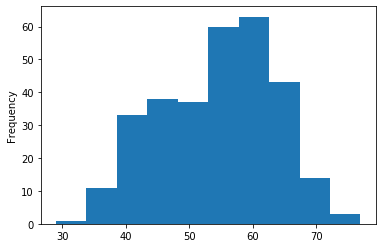

In [47]:
# Check age distribution
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp chest pain type
   - 0:Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic

In [49]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


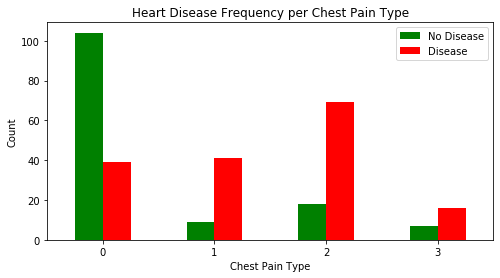

In [50]:
# Visualize crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(8,4),
                                  color=["green", "red"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [51]:
# Correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


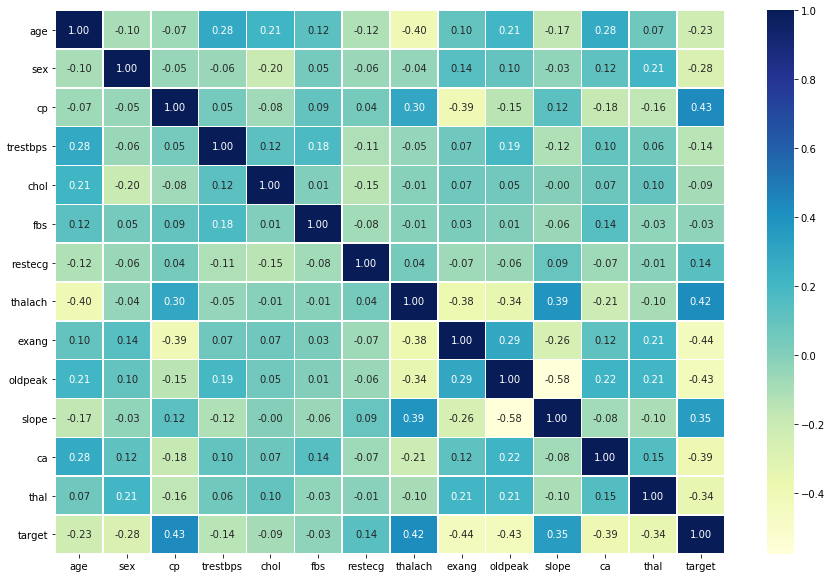

In [55]:
# Visualize correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt="0.2f",
                cmap="YlGnBu");

## 5. Modelling

In [56]:
# Split data into X & y
X = df.drop("target", axis=1)
y = df["target"]

# Setup random seed
np.random.seed(42)

# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Time to build ML model. Use Scikit-Learn ML map as reference (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

1. Logistic regression (not in standard list but it is the first model to try for classifcation)
2. KNN classifier
3. Random Forest Classifier

In [58]:
# Add models to a dictionary
models = {"Logistic Regression" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

# Modelling function
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates the provided ML models
    models: Dictionary of ML models
    X_train: Training data (no labels)
    y_train: Training labels
    X_test: Testing data (no labels)
    y_test: Testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Create dictionary to keep track of model scores
    model_scores = {}
    # Loop through all modesl
    for name, model in models.items():
        # Fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and capture score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [59]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            y_train=y_train,
                            X_test=X_test,
                            y_test=y_test)

model_scores

/home/vivekanand/github/MachineLearning/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

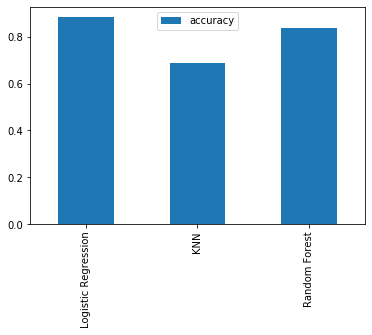

In [60]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Now we have a baseline model

**Next steps: Analyze the following**
1. Hyperparameter tuning
2. Feature importance
3. Confustion matrix
4. Precision
5. Recall
6. F1 score
7. Classification report
8. ROC curve
9. Area under the curve

### Hyperparameter tuning (by hand)

In [68]:
# Let's rune KNN

train_scores = []
test_scores = []

# Create a list for different neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit model
    knn.fit(X_train, y_train)
    
    # Update training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on test data: 75.41%


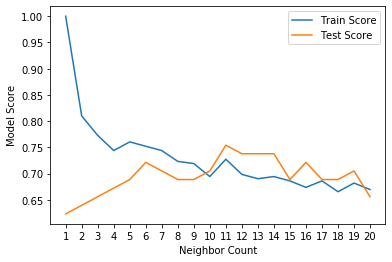

In [69]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Neighbor Count")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter turning with RandomizedSearchCV

We are going to tune:
1. LogisticRegression()
2. RandomForestClassifier()

... using RandomizedSearchCV

In [76]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [72]:
# Let's tune hyperparameters with RandomizedSearchCV

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit search model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [74]:
rs_log_reg.best_params_, rs_log_reg.score(X_test, y_test)

({'solver': 'liblinear', 'C': 0.23357214690901212}, 0.8852459016393442)

In [77]:
# Same for RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [79]:
rs_rf.best_params_, rs_rf.score(X_test, y_test)

({'n_estimators': 210,
  'min_samples_split': 4,
  'min_samples_leaf': 19,
  'max_depth': 3},
 0.8688524590163934)

## Hyperparameter turning with GridSearchCV

We are going to tune:
1. LogisticRegression()

... using GridSearchCV

In [81]:
# Different hyperparameters for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


In [82]:
gs_log_reg.best_params_, gs_log_reg.score(X_test, y_test)

({'C': 0.20433597178569418, 'solver': 'liblinear'}, 0.8852459016393442)

## Evaluate tuned ML classifier beyond accuracy

1. ROC curve and AUC score
2. Confusion matrix
3. Classification report
4. Precision
5. Recall
6. F1 score

... and it would be great if cross-validation is used where possible.

To make comparisons and evaluate our trained model, we have to make predictions first

In [84]:
# Predict with tuned model
y_preds = gs_log_reg.predict(X_test)

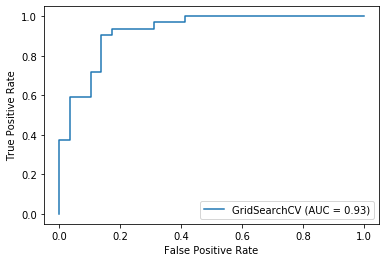

In [86]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

[[25  4]
 [ 3 29]]


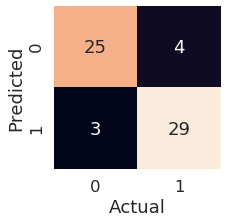

In [93]:
# Confustion matrix
print(confusion_matrix(y_test, y_preds))

sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    
plot_conf_matrix(y_test, y_preds);

Now we haev ROC curve, AUC metric and confusion matrix.

Let's get classification report as well as cross-validated precision, recall and f1-score

In [94]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using corss validation

In [95]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [97]:
# Create new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

# Cross-val accuracy
cv_acc = cross_val_score(clf,
                        X, 
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)

# Cross-val precision
cv_precision = cross_val_score(clf,
                        X, 
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)

# Cross-val recall
cv_recall = cross_val_score(clf,
                        X, 
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)

# Cross-val f1
cv_f1 = cross_val_score(clf,
                        X, 
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)

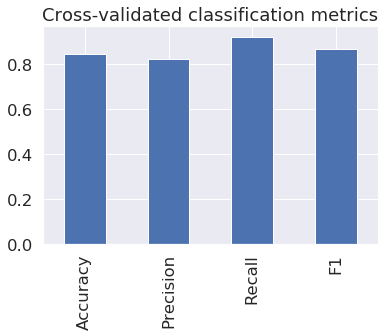

In [100]:
# Visualize corss-validation metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature importance

Another way of saying which one(s) contributed the most to the outcome and how much

It is different for each ML model

In [102]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")

clf.fit(X_train, y_train);

In [103]:
# Check coef_
clf.coef_

array([[ 0.00316727, -0.86044576,  0.66067074, -0.01156993, -0.00166374,
         0.04386132,  0.31275782,  0.02459361, -0.60413035, -0.56862855,
         0.45051615, -0.63609861, -0.67663376]])

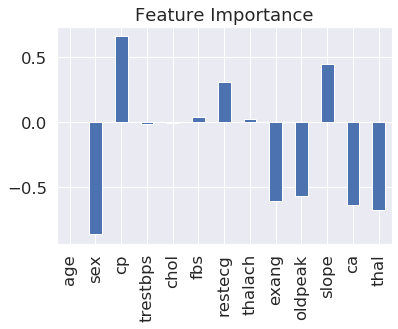

In [106]:
# Match coef to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [109]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [110]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric

* Could you collect more data
* Could you try a better model Like CatBoost or XGBoost?
* Could you improve current model?

If you have hit your evaluation metric
* How would you export and share it with others?